# Part 1. Logistic regression intro

In [41]:
import scipy as sp
import scipy.linalg as spla
import scipy.optimize as spopt
import scipy.stats as spst

import numpy as np
import numpy.linalg as npla

import statsmodels as sm
import statsmodels.api as sma
smfOLS = sma.regression.linear_model.OLS.from_formula
smfLGT = sm.discrete.discrete_model.Logit.from_formula

import seaborn as sb
import pandas as pd

import matplotlib.pyplot as plt

from inspect import signature as sig

In [42]:
# matplotlib image size and resolution
mpl_options = {"figsize":(8,8), "dpi":100}
sb.set(rc={'figure.figsize':(8,8)})

### То understand the logistic regression, we need to understand where it came from. Typically we are trying to fit a line through a cloud of datapoints. The x variables can be continuous or discrete byt the y variable is always continuous.
### For example, "Income ~ Age + YearsEducation" или "LifeExpectancy ~ Income"

In [43]:
x=np.random.uniform(size=100)
x=x-x.mean()
eps=np.random.uniform(size=100)*2
eps=eps-eps.mean()

y = 3.45*x + eps

<AxesSubplot:>

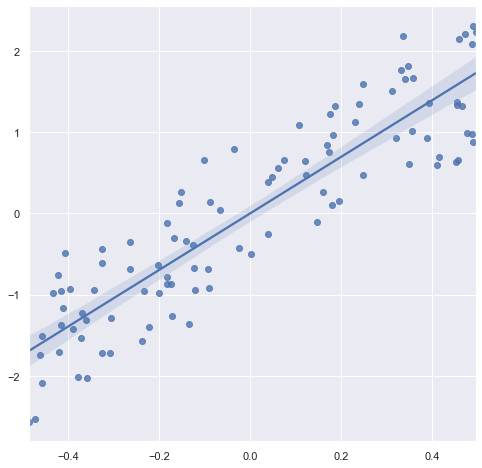

In [44]:
sb.regplot(x=x, y=y)

In [45]:
df = pd.DataFrame([])
df['Income']=x
df['Age']=y
model = smfOLS("Income ~ Age", data=df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     418.6
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           3.76e-37
Time:                        22:00:01   Log-Likelihood:                 57.126
No. Observations:                 100   AIC:                            -110.3
Df Residuals:                      98   BIC:                            -105.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.819e-17      0.014  -2.04e-15      1.000      -0.027       0.027
Age            0.2329      0.011     20.460      0.000       0.210       0.256
==============================================================================
Omnibus:                        2.320   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.948
Skew:                           0.212   Prob(JB):                        0.377
Kurtosis:                       2.463   Cond. No.                         1.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What if the outcome variable is discrete, like "getting married". We could try

In [46]:
x=np.random.uniform(size=100)
x=x-x.mean()
eps=np.random.uniform(size=100)*2
eps=eps-eps.mean()

y = (np.sign(3.45*x + eps)+1)/2

<AxesSubplot:>

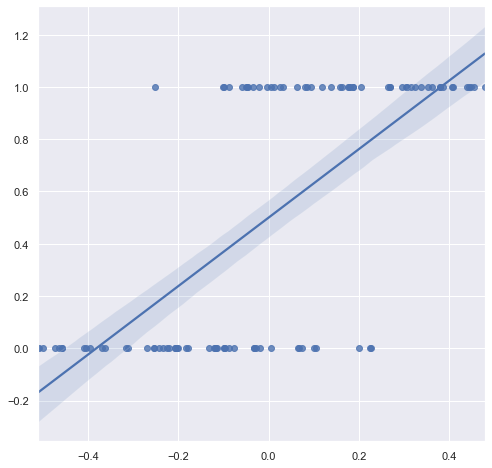

In [47]:
sb.regplot(x=x, y=y)

In [48]:
df = pd.DataFrame([])
df['Income']=x
df['Univ'] = y
model = smfOLS("Univ ~ Income", data=df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Univ   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     86.04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           4.52e-15
Time:                        22:00:01   Log-Likelihood:                -41.071
No. Observations:                 100   AIC:                             86.14
Df Residuals:                      98   BIC:                             91.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5000      0.037     13.566      0.000       0.427       0.573
Income         1.3096      0.141      9.276      0.000       1.029       1.590
==============================================================================
Omnibus:                        2.407   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.641
Skew:                          -0.066   Prob(JB):                        0.440
Kurtosis:                       2.386   Cond. No.                         3.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Clearly, this is a very poor fitting/prediction exercise
### It would be great to have a model where
- the fitted values are between 0 and 1
- the optimization is convex
- could use covariates

<AxesSubplot:>

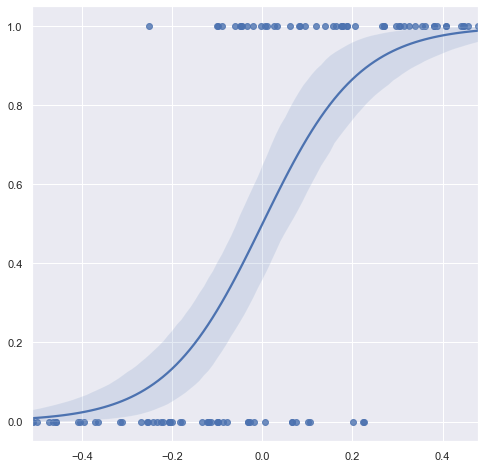

In [49]:
sb.regplot(x=x, y=y, logistic = True)

In [50]:
df = pd.DataFrame([])
df['Income']=x
df['Univ']=y
model = smfLGT("Univ ~ Income", data=df)
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.393922
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Univ   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Oct 2021   Pseudo R-squ.:                  0.4317
Time:                        22:00:04   Log-Likelihood:                -39.392
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.026e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0042      0.282     -0.015      0.988      -0.556       0.548
Income         9.3399      1.832      5.098      0.000       5.749      12.931
==============================================================================
"""

### A classic interpretation of the regression is estimating a certain parameter of the distribution of $(X,Y)$, modeled in a particular functional form, which is computationally convenient and easy to interpret
- standard ols regression is linear in X conditional average: $$E[Y|X]=\beta' X$$
- logistic regression is "logistic" in X conditional probability: $$\mathbb{E}[I(Y=1)|X] = Pr(Y=1|X)=\frac{1}{1+\exp(-\beta' X)}$$

### Apart from being computationally feasible (back in 20 century) the $F(z)=\frac{1}{1+\exp(-z)}$ transformation has image in [0,1], and is monotone. While it is not immediately obvious, there exist simple joint distributions that give rise to such functional forms. Although people care less about it these days

### In fact, both the OLS and Logit are maximum likelihood estimators in respective econometric models
- classic ols is $$y_i = \beta x_i + \sigma \varepsilon, \quad \varepsilon \sim \mathcal{N}(0,1)$$ where you observe $x_i$, $y_i$.
- classic logit is $$y_i = \beta x_i + \sigma \varepsilon, \quad \varepsilon \sim Logistic$$ but you observe $x_i$, $I(y_i>0)$.

### A general theorem argues that MLE consistently estimates the parameters (betas): Abraham Wald, (1949), Note on the Consistency of the Maximum Likelihood Estimate, Ann. Math. Stat.

### We can verify the functional forms by hand:

- ols: $$\mathbb{E}[y_i|x_i] = \beta' x_i + \sigma \mathbb{E}[\varepsilon|x_i]=\beta' x_i$$
- logit: $$Pr(y_i=1) = \mathbb{E}[y_i>0|x_i] = \mathbb{E}[\varepsilon_i>(-\beta' x_i)/\sigma|x_i]=$$ 
$$= \mathbb{E}[-\tilde\varepsilon_i>(-\beta' x_i)/\sigma|x_i]= \mathbb{E}[\tilde\varepsilon_i<(\beta' x_i)/\sigma|x_i]=F(\beta' x_i/\sigma)$$
since $\tilde \varepsilon=-\varepsilon$ by symmetry

### We can verify the likelihoods
- ols: $$f_{nor}(\varepsilon)=\frac{1}{\sqrt{2 \pi}}\exp^{\frac{-\varepsilon^2}{2}} \quad \Rightarrow \quad \mathcal{LL}=\sum_{i=1}^n \frac{-\varepsilon_i^2}{2} + K = \frac{-1}{\sigma^2} \sum (y_i - \beta' x_i)^2 + K \to \max_{\beta, \sigma}$$
- logit: $$F_{log}(\varepsilon)=\frac{1}{1+\exp^{-\varepsilon}}=1-F_{log}(-\varepsilon) \quad \Rightarrow \quad \mathcal{L}=\prod F^{y_i}(\beta' x_i /\sigma) \cdot (1-F(\beta' x_i /\sigma))^{1-y_i}$$
$$ \mathcal{LL} = \sum_{y_i = 1} \log \frac{1}{1+\exp(-\beta' x_i /\sigma)} + \sum_{y_i = 0} \log \frac{\exp(-\beta' x_i /\sigma)}{1+\exp(-\beta' x_i /\sigma)} \to \max_{\beta, \sigma}$$
$$ \mathcal{LL} = \sum_{y_i = 1} \log \frac{1}{1+\exp(-\beta' x_i /\sigma)} + \sum_{y_i = 0} \log \frac{1}{1+\exp(\beta' x_i /\sigma)} \to \max_{\beta, \sigma}$$
- the latter is, in fact, the definition of logit
- there is one problem, however, that $\beta, \sigma$ are not jointly identified in the population
- if we add a constant into the regression, $\beta_0$ would be exactly equal to $1/\sigma$, so... always add a constant

### Time has come to assess convexity of the optimization problem. 
$$ \mathcal{LL} = \sum_{y_i = 0} (-\beta' x_i /\sigma) - \sum_{all} \log(1+\exp(-\beta' x_i /\sigma)) \to \max_{\beta}$$
### The thing is that $1+\exp(-z)$ is also log-concave, thus the log-likelihood (but not likeligood) is concave

## How about the regularization?

### If logit itself is convex, so it the regularization
- ols: $$ \quad Loss = \frac{1}{2n}\sum (y_i - \beta' x_i)^2 + a * ||w||_1 + b * \frac{||w||^2_2}{2} \to \min_{\beta}, \quad \text{where} \quad l1_{ratio} = \frac{a}{a+b}, \quad \alpha=a+b$$
- logit: $$ \quad Loss = \sum \log(1+\exp(-y_i \beta' x_i)) + a * ||w||_1 + b * \frac{||w||^2_2}{2} \to \min_{\beta}, \quad \text{where} \quad l1_{ratio} = \frac{a}{a+b}, \quad C=a+b$$

### Warning!!! Here $y_i$ takes values $\{-1,1\}$, as is a tradition in CS. This can be confusing.
- CS  : $\mathcal{L}=\prod F^{\frac{1+y_i}{2}}(\beta' x_i /\sigma) \cdot (1-F(\beta' x_i /\sigma))^{\frac{1-y_i}{2}} = \prod F(y_i \cdot \beta' x_i /\sigma)$ and $y_i \in \{-1,1\}$
- ECON: $\mathcal{L}=\prod F^{y_i}(\beta' x_i /\sigma) \cdot (1-F(\beta' x_i /\sigma))^{1-y_i}$ and $y_i \in \{0,1\}$

### Home Assignment

### Assignment 1 (1 point): Prove the equivalence of the two approaches, that is, $\hat \beta$ would be the same if we redefine $y$

In [51]:
def OLS_loss(Y, X, beta, a, b):
    z = Y - X@beta
    return np.square(z).sum()/(2*Y.size) + a*np.abs(beta).sum() + b*np.square(beta).sum()/2

def LGT_loss(Y, X, beta, a, b):
    z = -Y*(X@beta)
    o = np.zeros(Y.size) # np.ones(Y.size) -- error
    return np.logaddexp(o, z).sum() + a*np.abs(beta).sum() + b*np.square(beta).sum()/2

In [52]:
from scipy import optimize
from functools import partial
import matplotlib.pyplot as plt

In [53]:
X=x.reshape(-1, 1)
Y=2*y-1

In [54]:
def OLS_loss_partial(beta):
    return OLS_loss(Y, X, beta, a=0, b=0)
def LGT_loss_partial(beta):
    return LGT_loss(Y, X, beta, a=0, b=0)

In [55]:
beta_space = np.linspace(-10, 10, 100)
ols_losses = np.array([OLS_loss_partial([i]) for i in beta_space])
lgt_losses = np.array([LGT_loss_partial([i]) for i in beta_space])

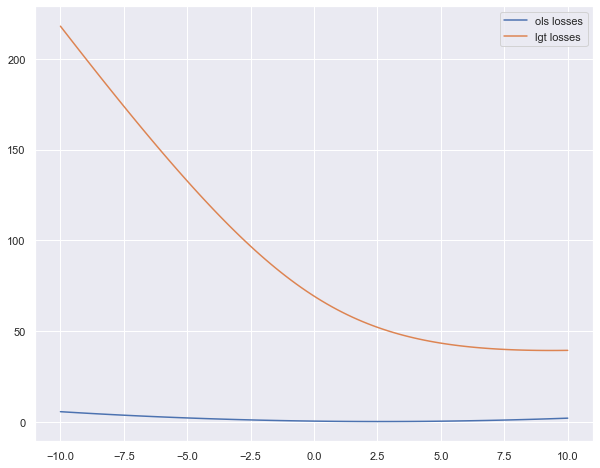

In [56]:
plt.figure(figsize=(10, 8))
plt.plot(beta_space, ols_losses, label='ols losses')
plt.plot(beta_space, lgt_losses, label='lgt losses')
plt.legend()
plt.show()

In [57]:
optimize.minimize(LGT_loss_partial, x0=[0])

      fun: 39.39226551380252
 hess_inv: array([[3.35571815]])
      jac: array([-4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([9.34055798])

#### Conclusion:
- we see, that we have almost the same coef: 13.58

### Assignment 2 (1 point): Find and fix the error in the code above

### Lets try sklearn (that is part of CS community)

In [58]:
from sklearn.linear_model import Ridge as skRidge
from sklearn.linear_model import Lasso as skLasso
from sklearn.linear_model import ElasticNet as skEN
from sklearn.linear_model import LogisticRegression as skLGT

In [59]:
x=np.random.normal(size=1000)
eps=np.random.logistic(size=1000)

# careful here goes -1,1
y = np.sign(1 + 2*x + eps)
x = x.reshape(1000, 1)

In [60]:
# Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance
x.dtype, y.dtype

(dtype('float64'), dtype('float64'))

In [61]:
sig(skLGT)

<Signature (penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)>

In [62]:
sk_options={'penalty':'elasticnet', 'solver':'saga', 
           'fit_intercept':True, 'l1_ratio':1, 'C':1,
           'verbose':1, 'n_jobs':10}

In [63]:
model = skLGT(**sk_options).fit(x,y)
model.intercept_, model.coef_

convergence after 11 epochs took 0 seconds


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:    0.0s finished


(array([1.13983328]), array([[1.98094508]]))

### Lets try statsmodels (thats part of Econ community)

In [64]:
import statsmodels.formula.api as smf

In [65]:
yecon = (y+1)/2

In [66]:
data = np.hstack((x, yecon.reshape(1000, 1)))
data.shape

(1000, 2)

In [67]:
df = pd.DataFrame(data, columns = ['x', 'y'])
df.head()

,x,y
0,-1.103667,0.0
1,-1.308432,0.0
2,-0.151828,1.0
3,-0.694784,1.0
4,-2.037444,0.0


In [68]:
formula = 'y ~ x'
model = smf.logit(formula, data=df).fit()

Optimization terminated successfully.
         Current function value: 0.420828
         Iterations 7


In [69]:
from inspect import signature
signature(smf.logit)

<Signature (formula, data, subset=None, drop_cols=None, *args, **kwargs)>

In [70]:
model.params

Intercept    1.146050
x            1.998217
dtype: float64

### Assignment 3 (3 point): Write your own logistic regression that replicates the output of the function below

In [71]:
def assignment_3_reference(formula, data):
    model = smf.logit(formula, data=df).fit()
    return model.params
    
x = assignment_3_reference('y ~ x', df)

Optimization terminated successfully.
         Current function value: 0.420828
         Iterations 7


In [72]:
x

Intercept    1.146050
x            1.998217
dtype: float64

Logistict loss for {0, 1} to be optimized:
$$
-ylog(\hat y) - (1-y)log(1 - \hat y)
$$

where 

$$
\hat y = \sigma (x' \beta)
$$

In [73]:
import statsmodels.api as sm_api
class MySimpleLogistic1:
    def fit(self, formula, data):
        ycolumn = formula.split(' ~ ')[0]
        xcolumns = formula.split(' ~ ')[1]
        
        y = data[ycolumn].values
        X = sm_api.add_constant(data[xcolumns].values)
        
        def _logistic_loss(beta):
            yhat = X.dot(beta)
            yhat = 1 / (1+np.exp(-yhat))
            loss = -y*np.log(yhat) - (1-y)*np.log(1-yhat)
            
            return np.mean(loss)
        
        return optimize.minimize(_logistic_loss, [0, 0])

In [74]:
def assignment_3(formula, data):
    model = MySimpleLogistic1()
    return model.fit(formula, data)

In [75]:
assignment_3('y ~ x', df)

      fun: 0.42082759318668284
 hess_inv: array([[ 7.84392297,  3.54727393],
       [ 3.54727393, 13.30092299]])
      jac: array([4.27290797e-06, 4.35486436e-06])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 10
     njev: 11
   status: 0
  success: True
        x: array([1.14611723, 1.9983173 ])

#### Conclusion:
we have:

- Intercept    0.903511
- x            2.049772

in statsmodels, and:

- Intercept    0.90347338
- x            2.04987129

in our logistic regression

### Average Marginal Effects
- ols $$\mathbb{E}_x[\frac{\mathbb{E}_{\varepsilon}[Y|X]}{\partial X}] = \mathbb{E}_x[\beta] = \beta$$
- logit $$\mathbb{E}_x[\frac{Prob_{\varepsilon}(Y=1|X)}{\partial X}] = \mathbb{E}_x[\frac{F(\beta' X)}{\partial X}] = \beta * \mathbb{E}_x[f(\beta' X)] \approx \frac{\beta}{n} \sum_{i=1}^n \frac{\exp^{-\beta' x_i}}{(1+\exp^{-\beta' x_i})^2}$$

### in ols local = average, but in logit local != average due to linearity. we always want average effects

### Assignment 4 (2 points): Write your own logistic regression with $\alpha$ and $l1ratio$ as parameters

Logistict loss with regularization for {0, 1} to be optimized:
$$
\sum -ylog(\hat y) - (1-y)log(1 - \hat y) + \sum \alpha * l1\_ratio ||\beta||_1 + 0.5 * \alpha * (1-l1\_ratio) * ||\beta||_2^2
$$

where 

$$
\hat y = \sigma (x' \beta)
$$

## I am using PyTorch, since it has great api for SGD

In [76]:
import statsmodels.api as sm_api
import torch
from torch.optim import Adam, SGD

In [77]:
class MySimpleLogistic2:
    def __init__(self, alpha, l1_ratio):
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.model = torch.nn.Linear(in_features=2, out_features=1, bias=False)
        self.n_epochs = 200
        self.lr = 4e-3
        
    def _loss_function(self, yhat, y, beta, eps=1e-4):
        return torch.sum(
            -y*torch.log(yhat + eps) - (1-y)*torch.log(1-yhat + eps)
        ) + self.alpha*self.l1_ratio*torch.abs(beta).sum() + 0.5*self.alpha*(1-self.l1_ratio)*(beta**2).sum()
    
    def calc_loss(self, X, y):
        yhat = self.predict(X)
        l1_parameters = []
        for parameter in self.model.parameters():
            l1_parameters.append(parameter.view(-1))
        l1_parameters = torch.cat(l1_parameters)
        
        return self._loss_function(yhat, y, l1_parameters).item()
        
    def predict(self, X):
        with torch.no_grad():
            return torch.sigmoid(self.model(X).flatten())
        
    def fit_on_data(self, formula, data):
        ycolumn = formula.split(' ~ ')[0]
        xcolumns = formula.split(' ~ ')[1]
        
        y = torch.FloatTensor(data[ycolumn].values)
        X = torch.FloatTensor(sm_api.add_constant(data[xcolumns].values))
        
        return self.fit(X, y)
        
    
    def fit(self, X, y):
        prev_loss = np.inf
        opt = SGD(self.model.parameters(), lr=self.lr)
        
        for i in range(self.n_epochs):
            opt.zero_grad()
            yhat = torch.sigmoid(self.model(X).flatten())
            
            l1_parameters = []
            for parameter in self.model.parameters():
                l1_parameters.append(parameter.view(-1))
            l1_parameters = torch.cat(l1_parameters)         
            
            loss = self._loss_function(yhat, y, l1_parameters)
            
            if (loss.item() - prev_loss) > 0.1:
                # overfitting
                break
            else:
                prev_loss = loss.item()
                
            loss.backward()
            opt.step()
            
        return self.model.state_dict()['weight'].numpy(), loss.item()

In [78]:
def assignment_4(formula, data):
    model = MySimpleLogistic2(alpha = 1, l1_ratio = 1)
    return model.fit_on_data(formula, data)

In [79]:
assignment_4('y ~ x', df)

(array([[1.1310636, 1.9760559]], dtype=float32), 423.7636413574219)

In [80]:
def assignment_4_reference(formula, data):
    ycolumn = formula.split(' ~ ')[0]
    xcolumns = formula.split(' ~ ')[1]

    y = data[ycolumn].values
    X = data[xcolumns].values.reshape(-1,1)
    model = skLGT(penalty='elasticnet', solver='saga', C=1, l1_ratio=1, fit_intercept=True)
    model.fit(X, y)
    return np.array([model.intercept_.tolist() + model.coef_.tolist()[0]])
    
x = assignment_4_reference('y ~ x', df)

In [81]:
x

array([[1.13995335, 1.98125442]])

#### Conclusion:
we have:

- Intercept    0.9801385
- x            2.0441394

in pytorch implementation, and:

- Intercept    0.98859743
- x            2.04853087

in sklearn implementation

### Assignment 5 (3 points): Write your own logistic regression with number of folds as parameter

In [82]:
from sklearn.model_selection import StratifiedKFold
from itertools import product

In [83]:
class MySimpleLogistic3:
    def __init__(self, folds_num: int):
        self.alpha_space = np.arange(1, 5)
        self.l1_ratio_space = np.arange(1, 5)
        self.folds_num = folds_num
        
    def _cv(self, model, X, y):
        cv = StratifiedKFold(n_splits=self.folds_num)
        loss_on_test = []
        for train_index, test_index in cv.split(X, y):
            X_train = X[train_index]
            X_test = X[test_index]
            y_train = y[train_index]
            y_test = y[test_index]
            
            model.fit(X_train, y_train)
            loss_on_test.append(model.calc_loss(X_test, y_test))
            
        return np.mean(loss_on_test)
        
    def fit(self, formula, data):
        ycolumn = formula.split(' ~ ')[0]
        xcolumns = formula.split(' ~ ')[1]
        
        y = torch.FloatTensor(data[ycolumn].values)
        X = torch.FloatTensor(sm_api.add_constant(data[xcolumns].values))
        
        losses = []
        params = []
        
        for alpha, l1_ratio in product(self.alpha_space, self.l1_ratio_space):
            model = MySimpleLogistic2(alpha, l1_ratio)
            losses.append(self._cv(model, X, y))
            params.append([alpha, l1_ratio])
        
        best_params = params[np.argmin(losses)]
        coefs, _ = MySimpleLogistic2(alpha, l1_ratio).fit(X, y)
        
        return {
            'best_params' : {
                'alpha' : best_params[0],
                'l1_ratio' : best_params[1]
            },
            'coefs' : coefs
        }

In [104]:
def assignment_5(formula, data):
    model = MySimpleLogistic3(3)
    return model.fit_on_data(formula, data)

In [105]:
model.fit('y ~ x', df)

{'best_params': {'alpha': 1, 'l1_ratio': 1},
 'coefs': array([[1.1963911, 2.1735234]], dtype=float32)}

### Assignment 6 (bonus 5 points): Write the ordered/latent/rand logit and compare to existing library

Latent logit:
$$\mathcal{L}=\prod G(x)^{y_i} \cdot (1-G(x))^{1-y_i}, \quad G(x) = \rho F(\beta^1 x_i) + (1-\rho)F(\beta^2 x_i)$$

So the loss is: $ -log \mathcal{L}$

In [101]:
class LatentLogit(torch.nn.Module):
    def __init__(self, ro):
        super().__init__()
        self.ro = ro
        self.beta1 = torch.nn.Linear(in_features=2, out_features=1, bias=False)
        self.beta2 = torch.nn.Linear(in_features=2, out_features=1, bias=False)

    def forward(self, X):
        return self.ro*torch.sigmoid(self.beta1(X).flatten()) + (1-self.ro)*torch.sigmoid(self.beta2(X).flatten())

class MySimpleLogistic4:
    def __init__(self, ro):
        self.model = LatentLogit(ro)
        self.n_epochs = 200
        self.lr = 4e-3
        
    def _loss_function(self, yhat, y, eps=1e-4):
        return torch.sum(
            -y*torch.log(yhat + eps) - (1-y)*torch.log(1-yhat + eps)
        )
    
    def fit_on_data(self, formula, data):
        ycolumn = formula.split(' ~ ')[0]
        xcolumns = formula.split(' ~ ')[1]
        
        y = torch.FloatTensor(data[ycolumn].values)
        X = torch.FloatTensor(sm_api.add_constant(data[xcolumns].values))
        
        return self.fit(X, y)
    
    def fit(self, X, y):
        prev_loss = np.inf
        opt = SGD(self.model.parameters(), lr=self.lr)
        
        for i in range(self.n_epochs):
            opt.zero_grad()
            yhat = self.model.forward(X)
            loss = self._loss_function(yhat, y)
            
            if (loss.item() - prev_loss) > 0.1:
                # overfitting
                break
            else:
                prev_loss = loss.item()
                
            loss.backward()
            opt.step()
        params = {
            'beta1' : self.model.beta1.state_dict()['weight'].numpy(),
            'beta2' : self.model.beta2.state_dict()['weight'].numpy()
        }
        return params, loss.item()

In [102]:
def assignment_6(formula, data):
    model = MySimpleLogistic4(ro=0.2)
    return model.fit_on_data(formula, data)

In [103]:
assignment_6('y ~ x', df)

({'beta1': array([[0.29662576, 2.0786707 ]], dtype=float32),
  'beta2': array([[1.4094714, 2.0676043]], dtype=float32)},
 420.4725341796875)

### Assignment 7 (bonus 5 points): Write confident Logit with crossvalidation for window size

### Comments for the HA
- deadline in 2 weeks
- this completes Test 1
- these are fully individual tasks, no cheating, please. 
- confirmed cheating will halve your grade.
- test your results against a simulation
- use markdowns to explain what you are doing
- for each task, make a main() function with an intuitive interface
- 2 groups is enough for "confident" logit
- 3 groups is enough for "ordered" logit